<a href="https://colab.research.google.com/github/RuhmaAlavi/AICP-Internship-/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Q1) Import libraries (Numpy, pandas, matplotlib, plotly and seaborn) and then read csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('menu.csv')

### Q2) Check statistical facts by checking all columns.Then calculate the maximum value of the following.sis

In [3]:
stats_all_col = df.describe()

max_values = df[['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars',
                 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
                 'Calcium (% Daily Value)', 'Iron (% Daily Value)']].max()

In [4]:
print("Statistical Facts for All Columns:")
print(stats_all_col)

print("\nMaximum Values for Specific Attributes:")
print(max_values)

Statistical Facts for All Columns:
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std 

### Q3) Check to see if infact there is any correlation between Calories and other independent variables

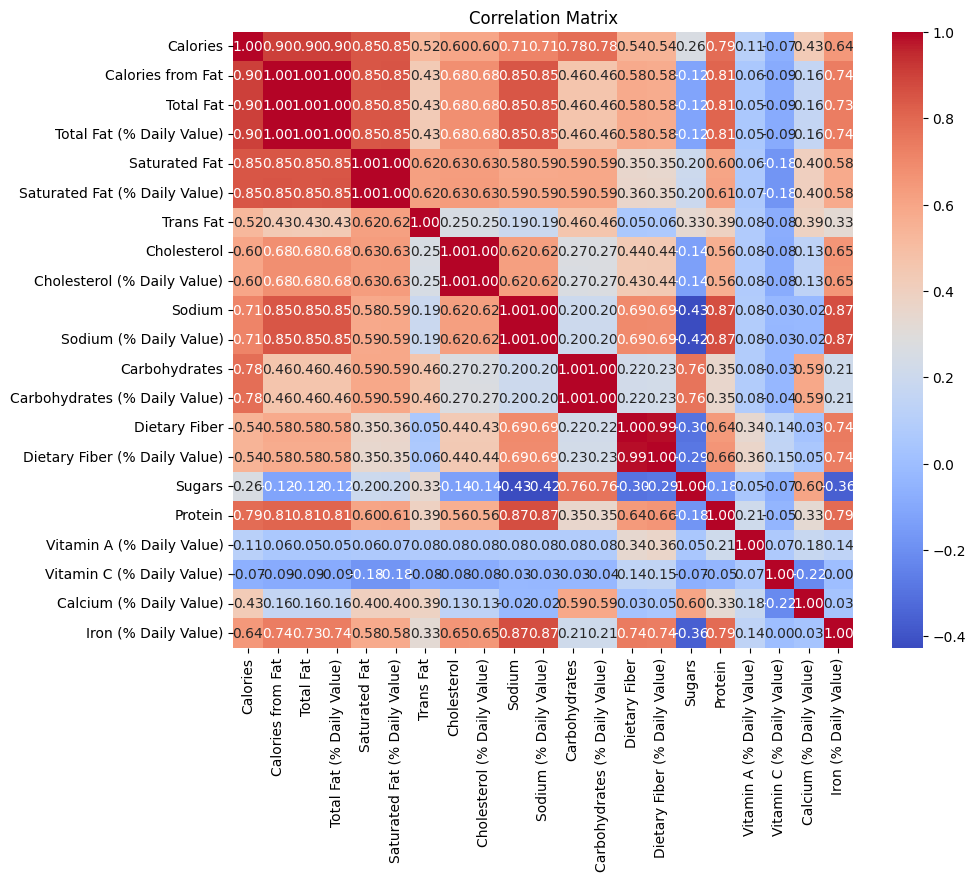

In [5]:
# Exclude non-numeric columns before calculating correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Q4) Draw boxplot for Calories vs Category to spot outliers and max calories category

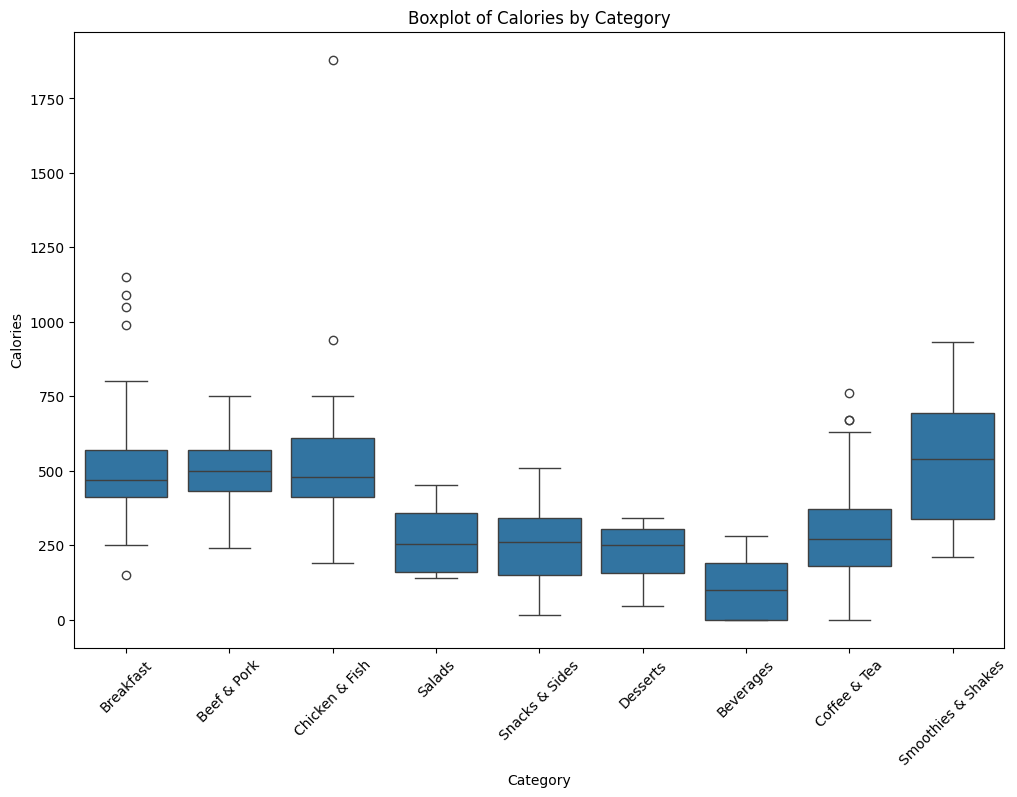

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Calories', data=df)
plt.title('Boxplot of Calories by Category')
plt.xticks(rotation=45)
plt.show()


### Q5) Figure out which exact item contains a high quantity for following:

In [7]:
attributes = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars',
              'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
              'Calcium (% Daily Value)', 'Iron (% Daily Value)']

max_items = {}
for attribute in attributes:
    max_index = df[attribute].idxmax()
    max_item = df.loc[max_index, 'Item']
    max_value = df.loc[max_index, attribute]
    max_items[attribute] = (max_item, max_value)

for attribute, (item, value) in max_items.items():
    print(f"{attribute}: {item} - {value}")

Calories: Chicken McNuggets (40 piece) - 1880
Total Fat: Chicken McNuggets (40 piece) - 118.0
Carbohydrates: Chocolate Shake (Large) - 141
Dietary Fiber: Big Breakfast with Hotcakes (Large Biscuit) - 7
Sugars: McFlurry with M&M’s Candies (Medium) - 128
Protein: Chicken McNuggets (40 piece) - 87
Vitamin A (% Daily Value): Premium Bacon Ranch Salad (without Chicken) - 170
Vitamin C (% Daily Value): Minute Maid Orange Juice (Large) - 240
Calcium (% Daily Value): Strawberry Shake (Large) - 70
Iron (% Daily Value): Big Breakfast with Hotcakes (Regular Biscuit) - 40


### Q6) Draw Stripplot for each category against the following attributes

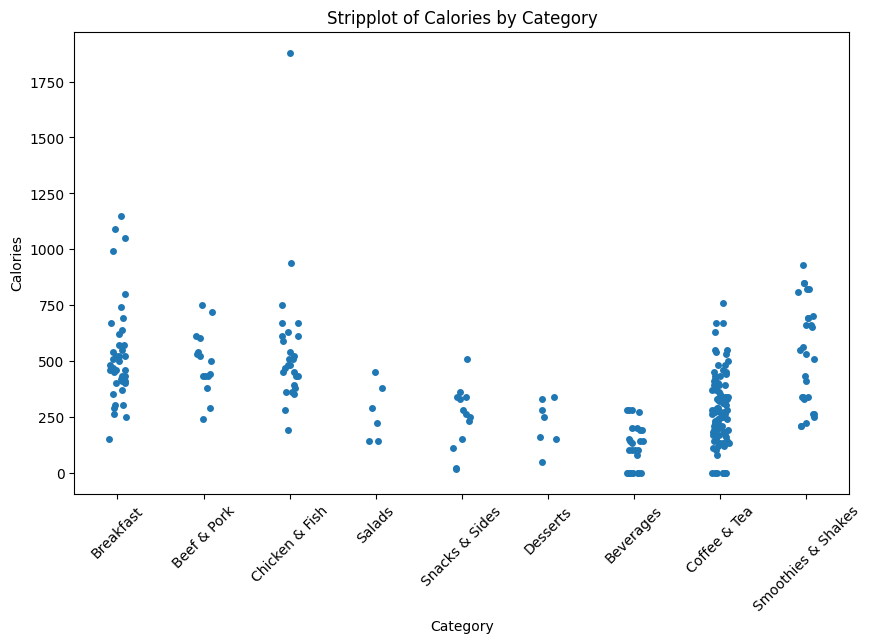

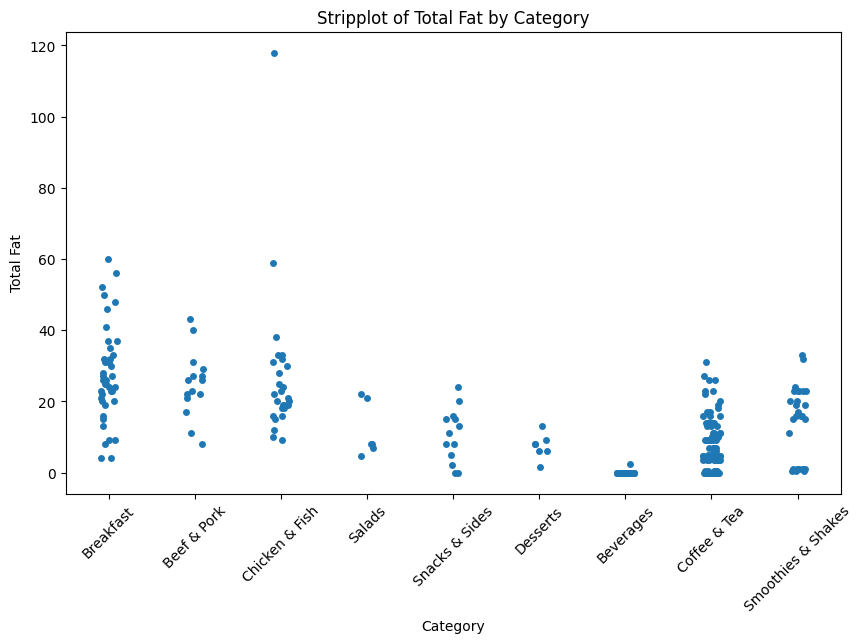

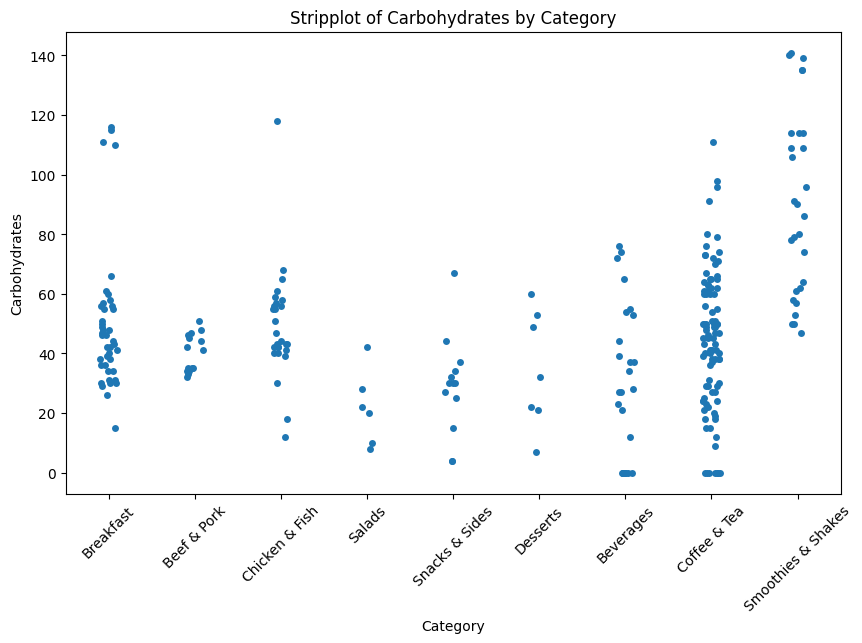

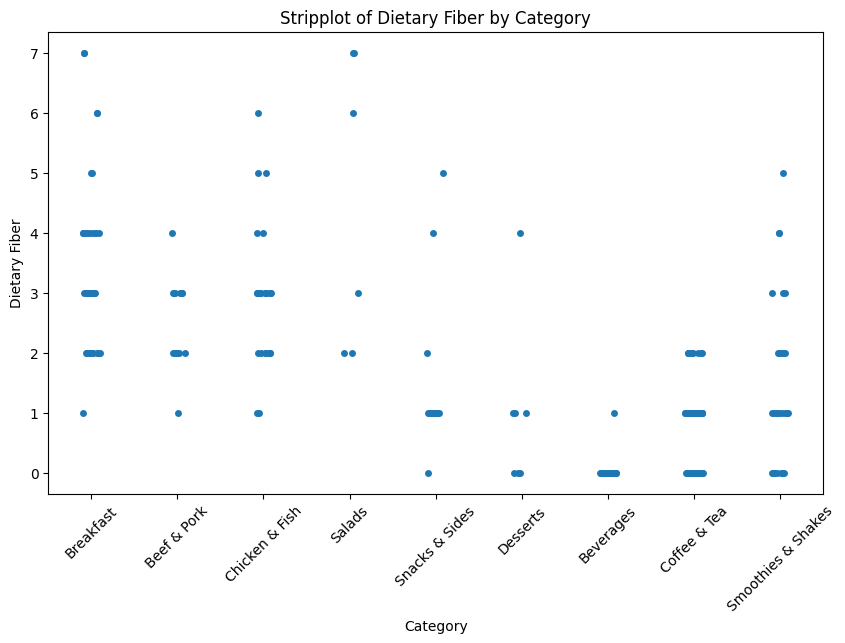

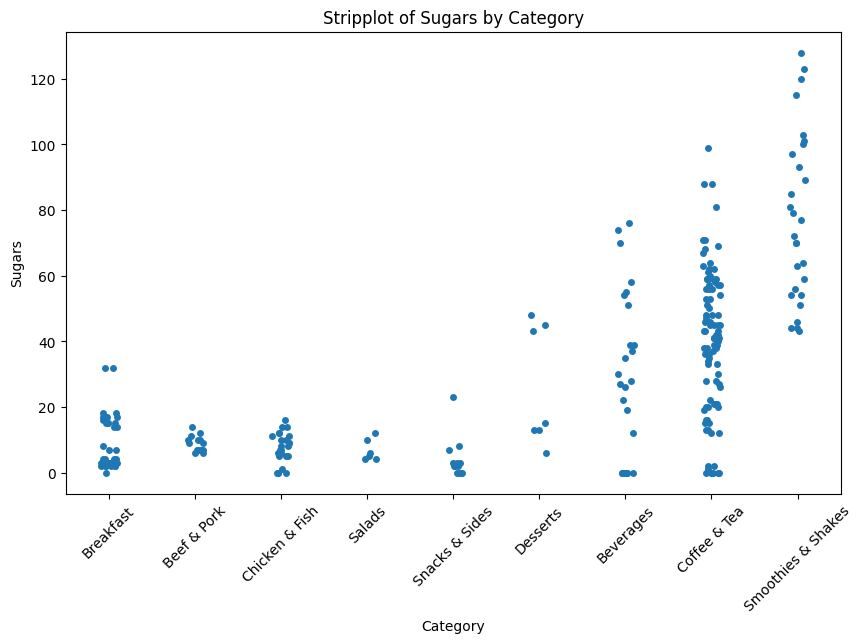

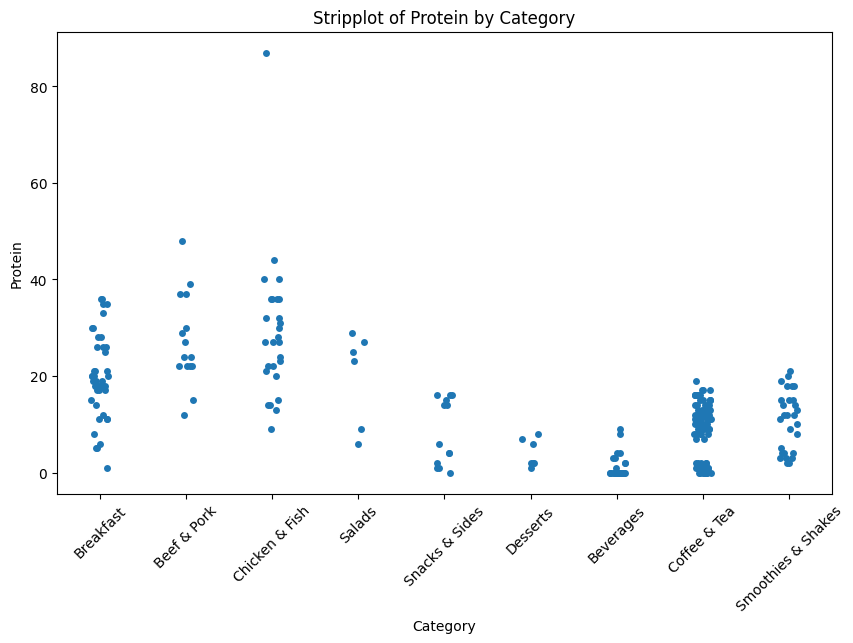

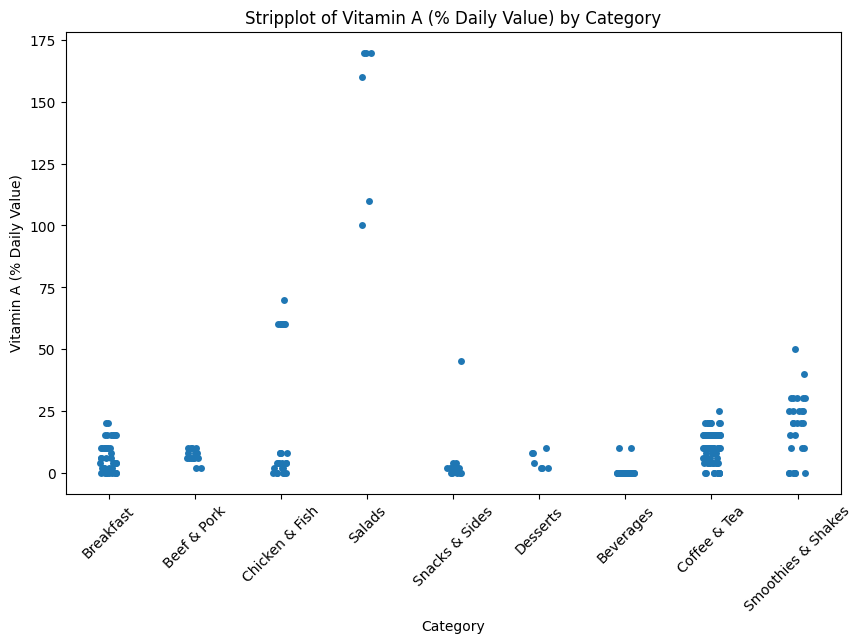

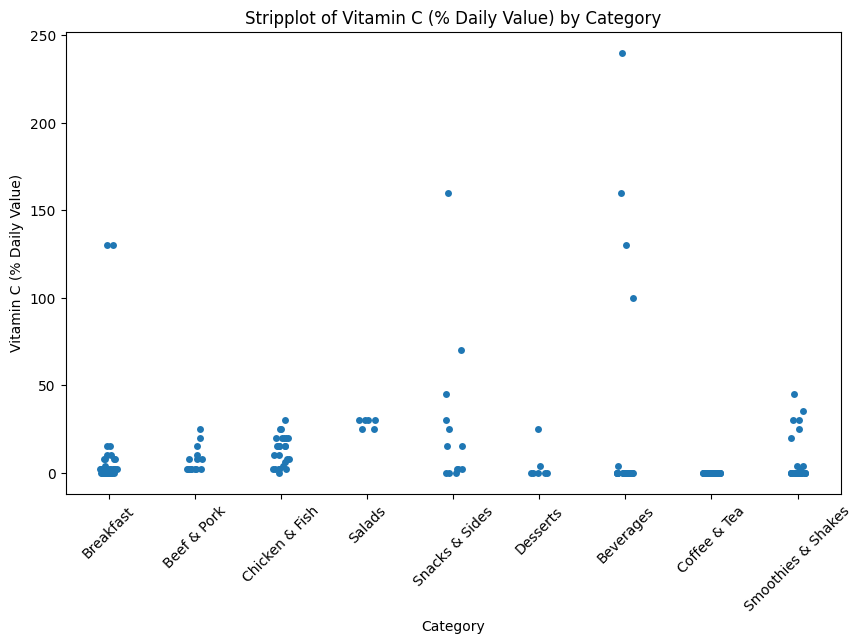

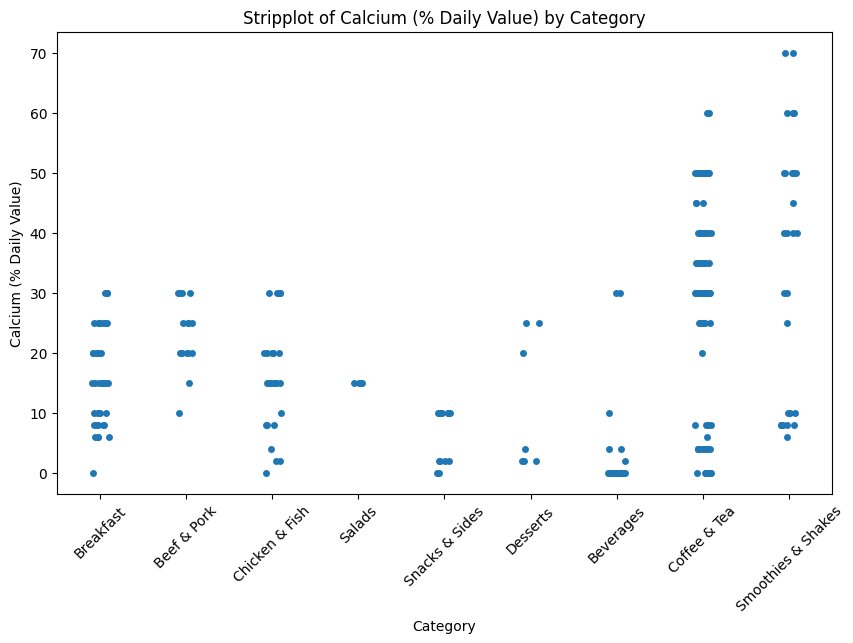

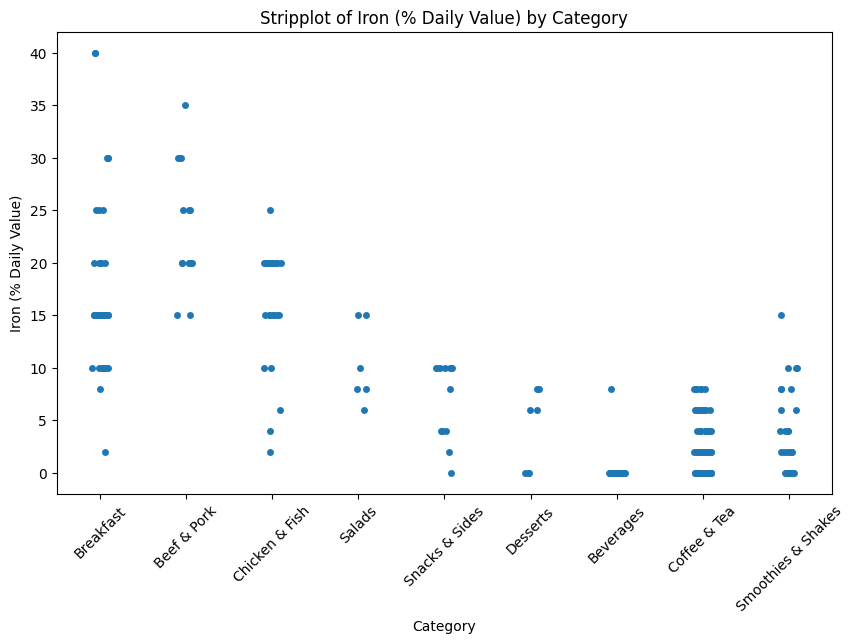

In [8]:
attributes = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars',
              'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
              'Calcium (% Daily Value)', 'Iron (% Daily Value)']

# Plot stripplot for each category against the attributes
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='Category', y=attribute, data=df, jitter=True)
    plt.title(f'Stripplot of {attribute} by Category')
    plt.xlabel('Category')
    plt.ylabel(attribute)
    plt.xticks(rotation=45)
    plt.show()

### Q.7) Draw a horizontal bar graph for items in each category against the calories.

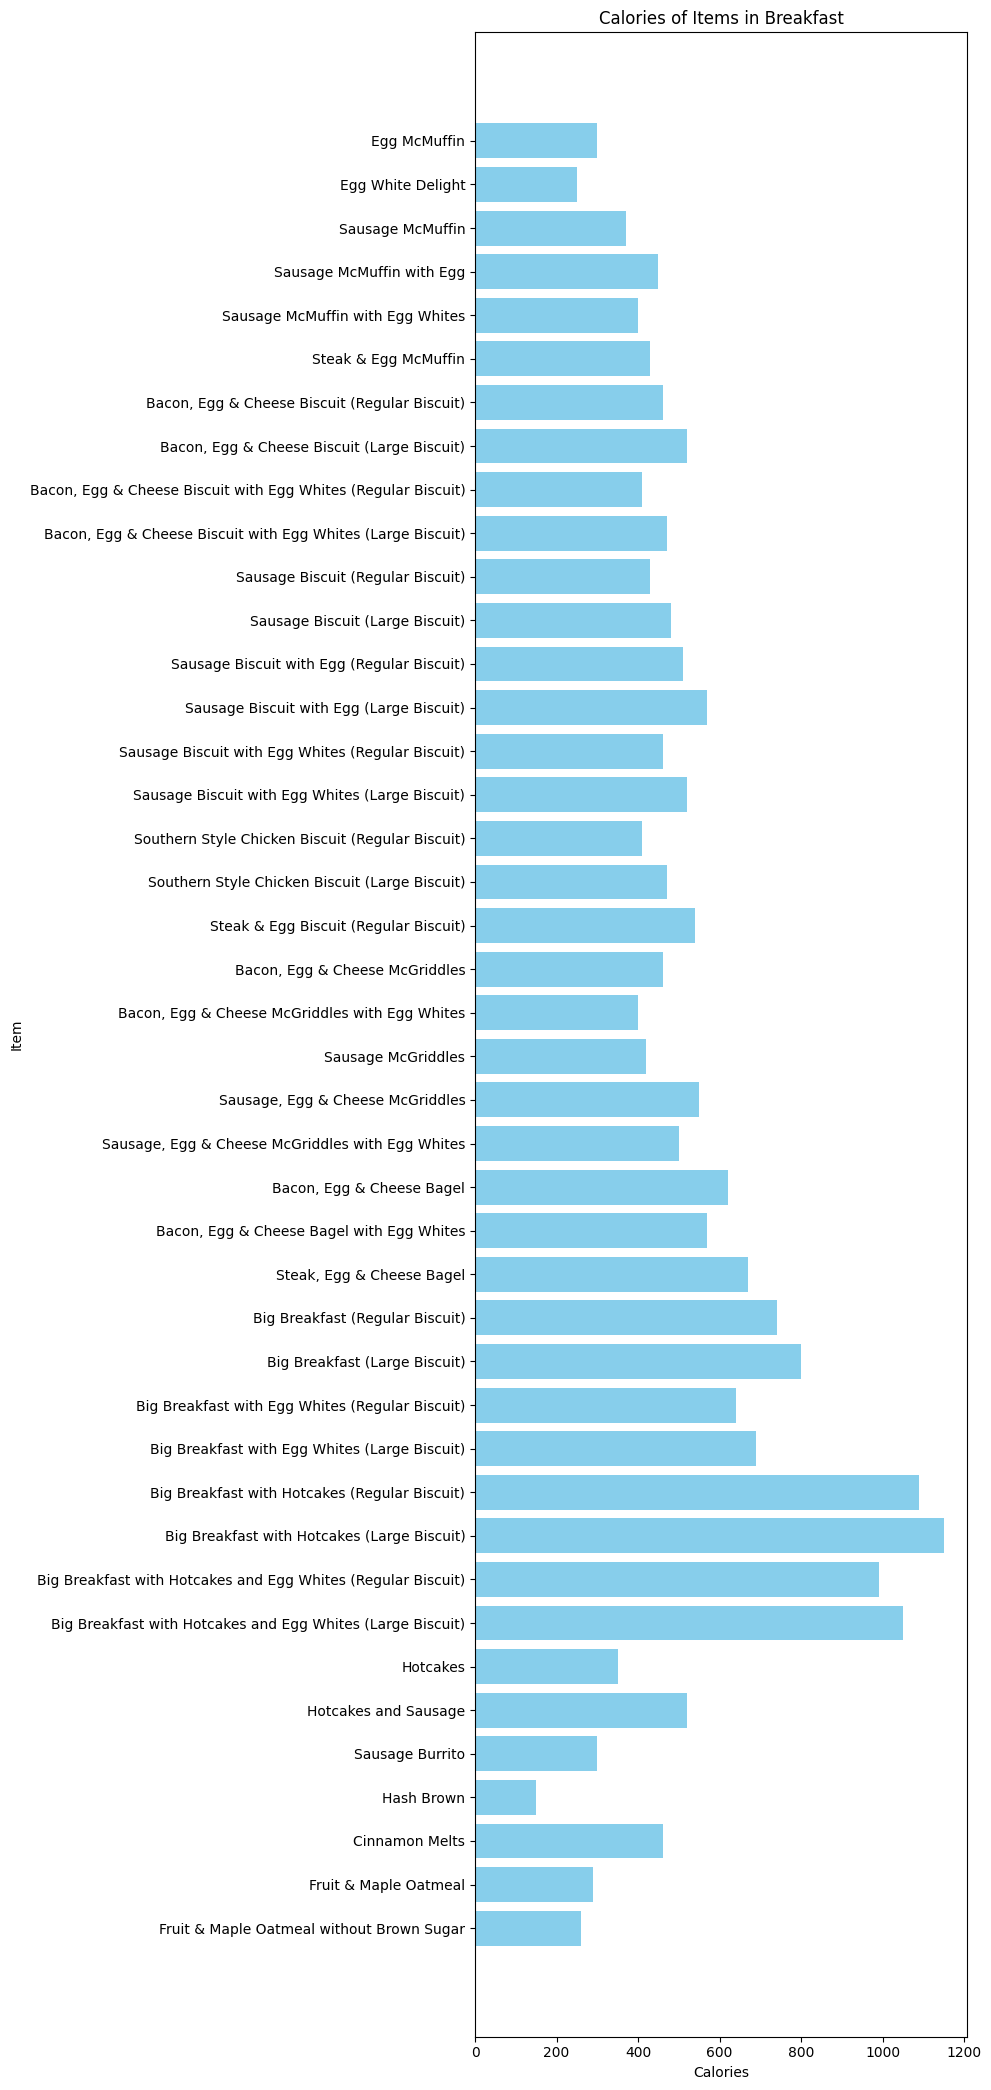

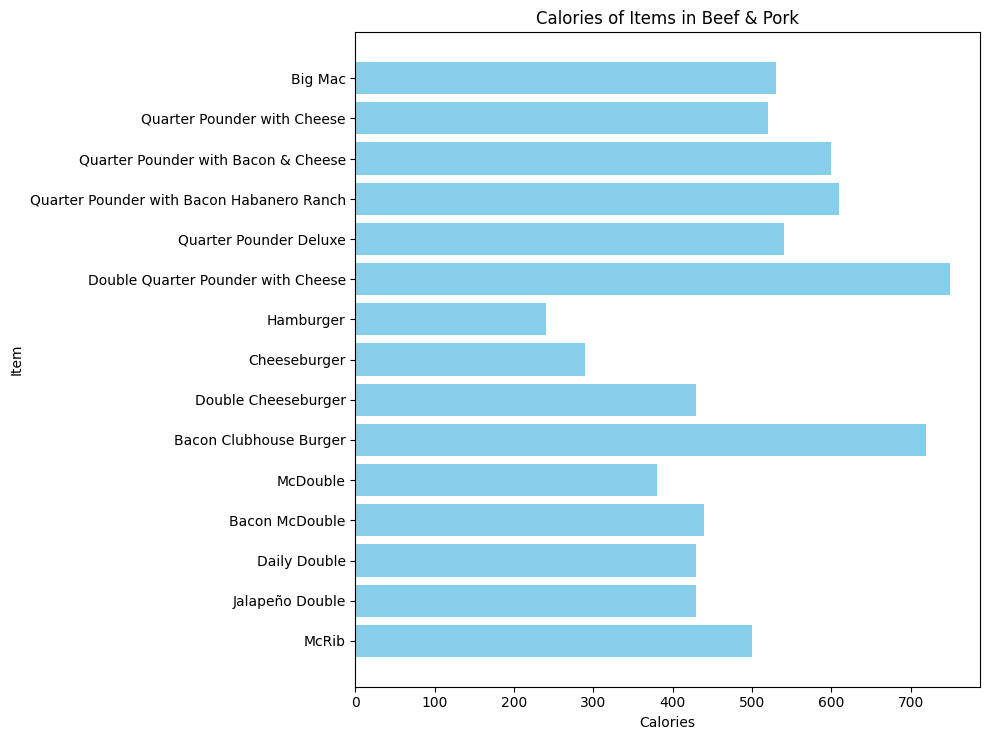

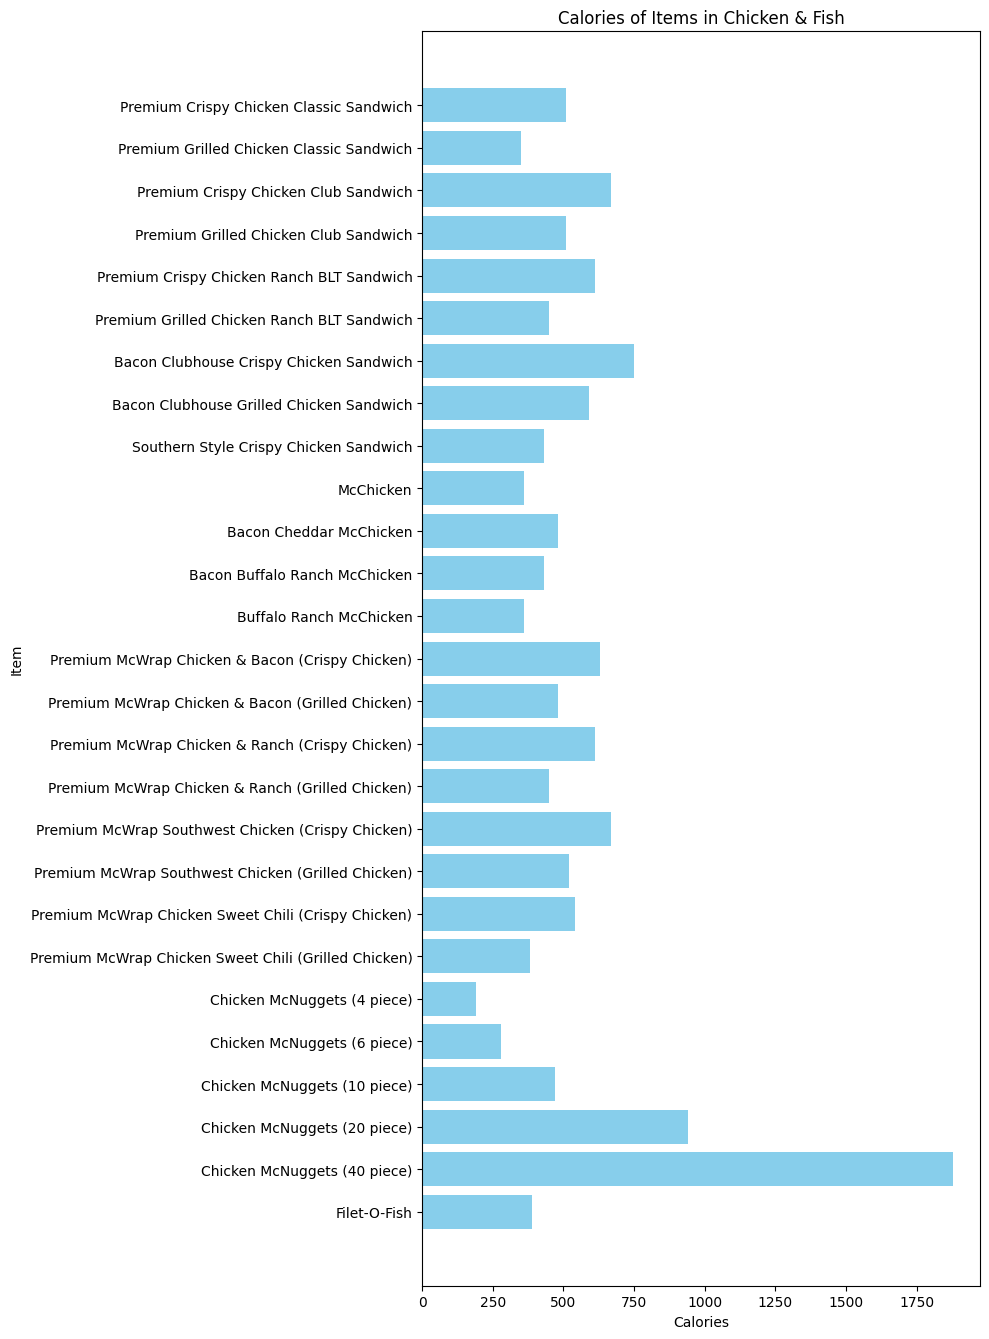

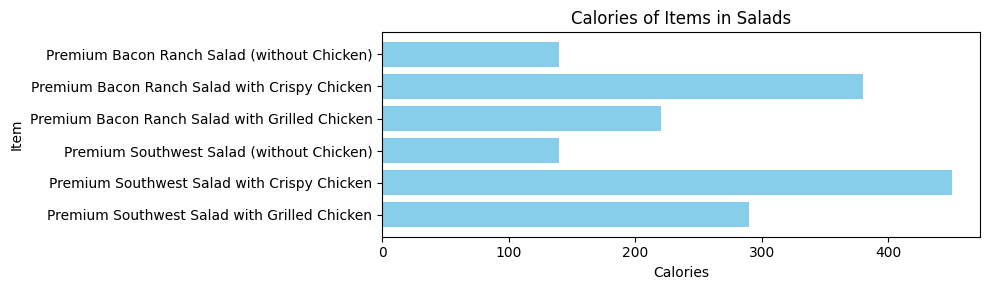

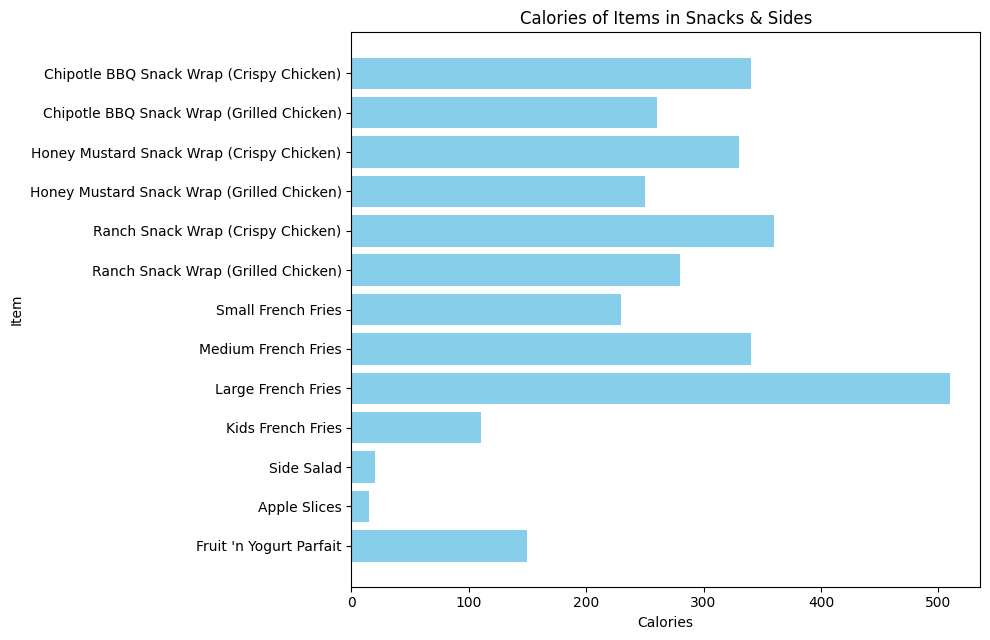

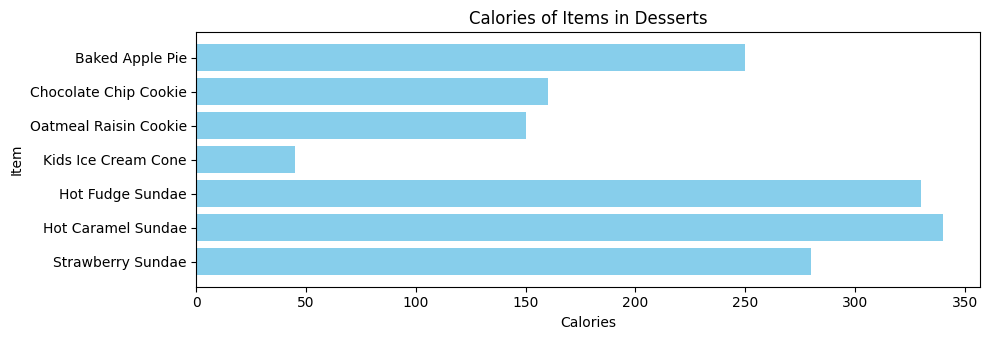

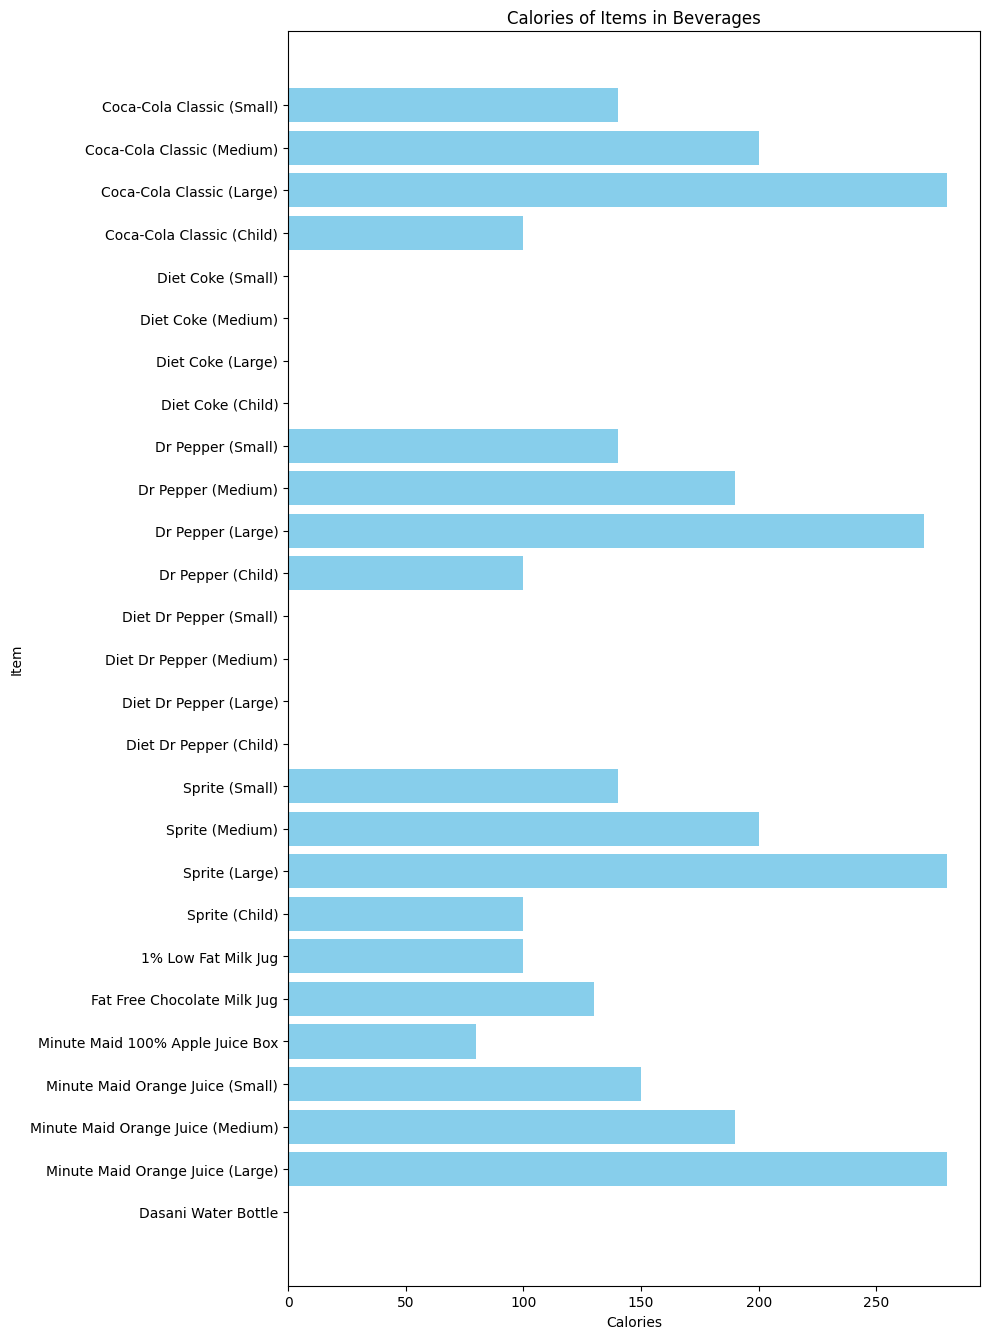

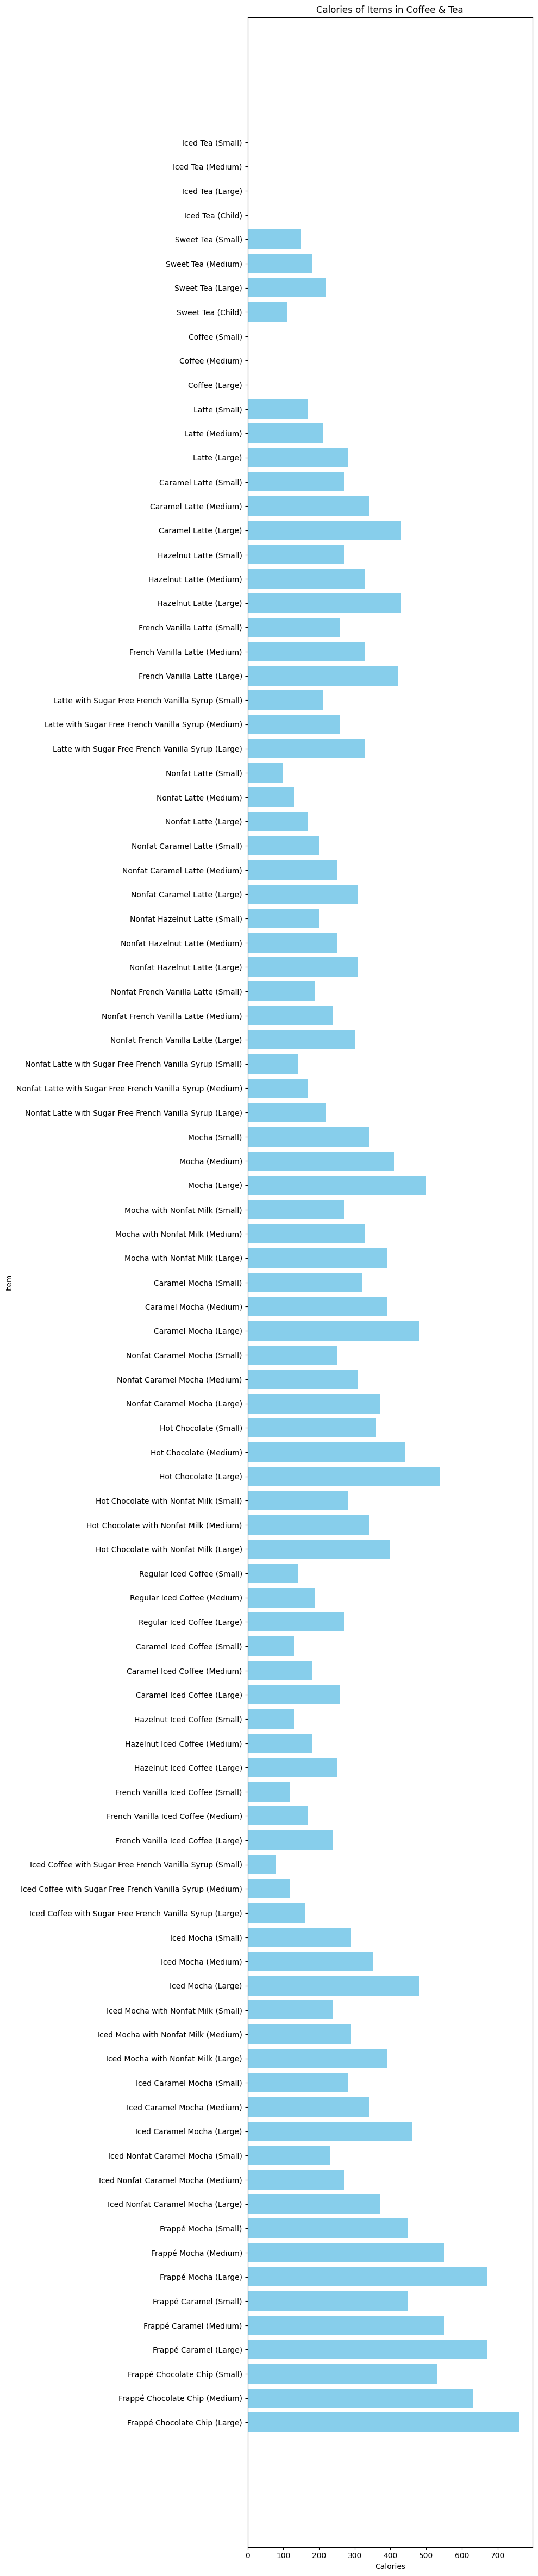

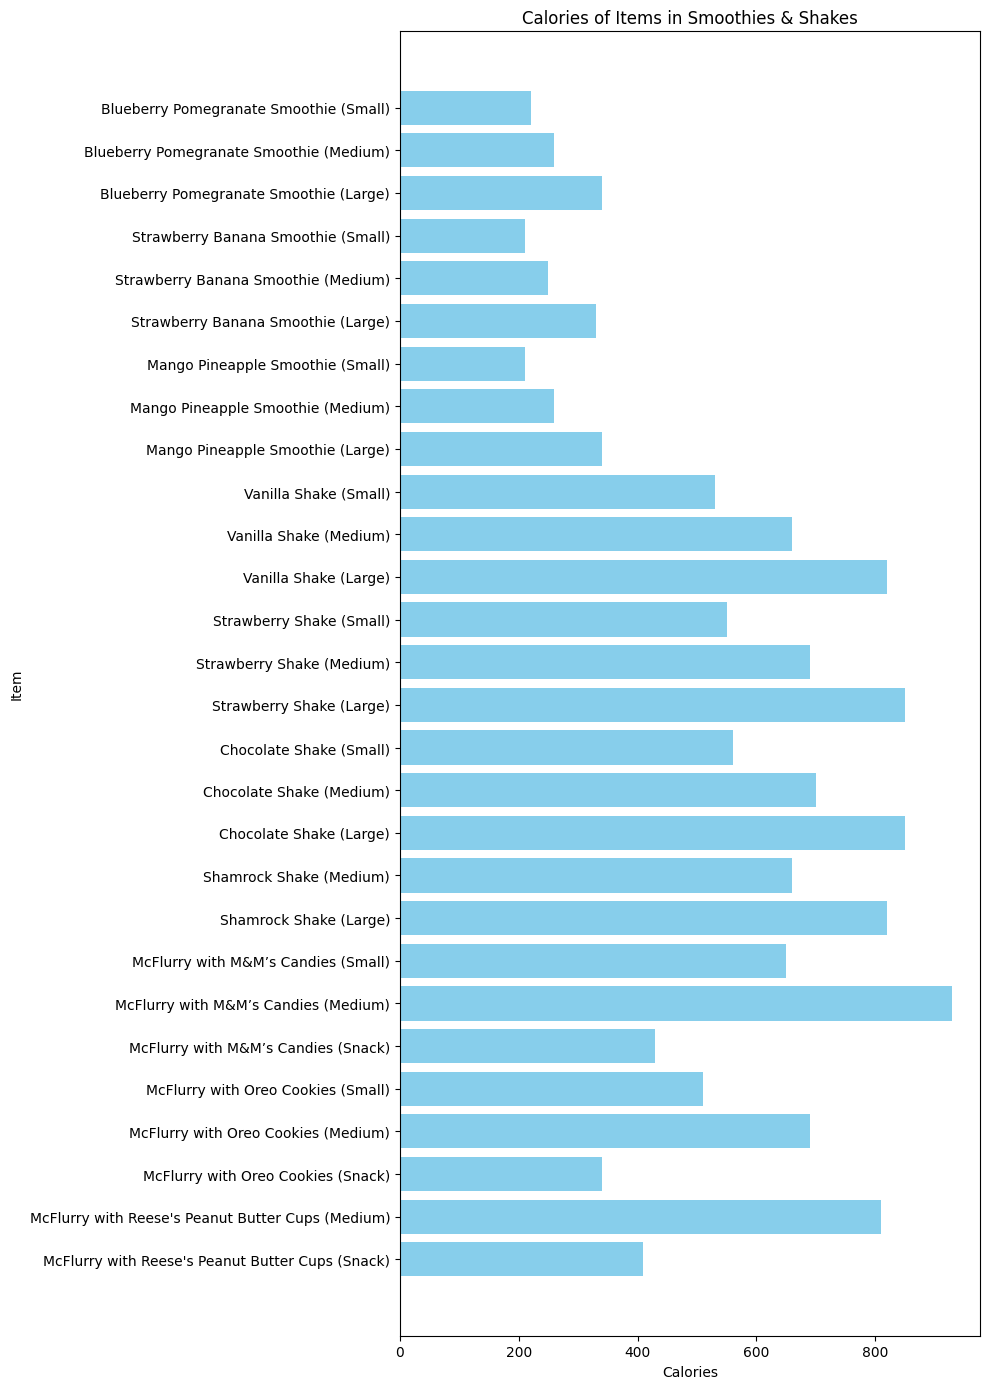

In [10]:
categories = df['Category'].unique()

for category in categories:
    category_df = df[df['Category'] == category]
    plt.figure(figsize=(10, len(category_df) * 0.5))
    plt.barh(category_df['Item'], category_df['Calories'], color='skyblue')
    plt.xlabel('Calories')
    plt.ylabel('Item')
    plt.title(f'Calories of Items in {category}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
